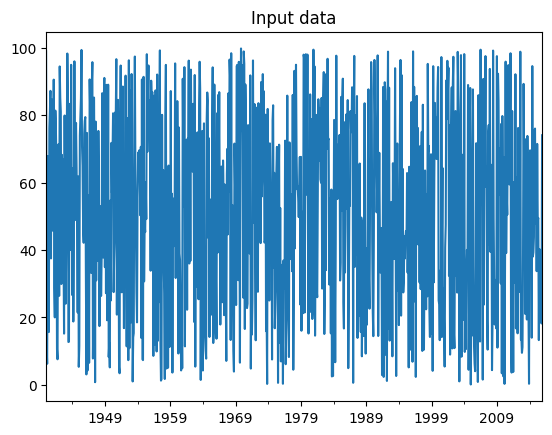

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def convert_data_to_timeseries(input_file, column, verbose=False):
    # Load the input file
    data = np.loadtxt(input_file, delimiter=',')

    # Extract the start and end dates
    start_date = str(int(data[0,0])) + '-' + str(int(data[0,1]))
    end_date = str(int(data[-1,0] + 1)) + '-' + str(int(data[-1,1] % 12 + 1))

    if verbose:
        print("\nStart date =", start_date)
        print("End date =", end_date)

    # Create a date sequence with monthly intervals
    dates = pd.date_range(start_date, end_date, freq='M')

    # Convert the data into time series data
    data_timeseries = pd.Series(data[:,column], index=dates)

    if verbose:
        print("\nTime series data:\n", data_timeseries[:10])

    return data_timeseries

if __name__=='__main__':
    # Input file containing data
    input_file = 'data_timeseries.txt'

    # Load input data
    column_num = 2
    data_timeseries = convert_data_to_timeseries(input_file, column_num)

    # Plot the time series data
    data_timeseries.plot()
    plt.title('Input data')
    plt.show()

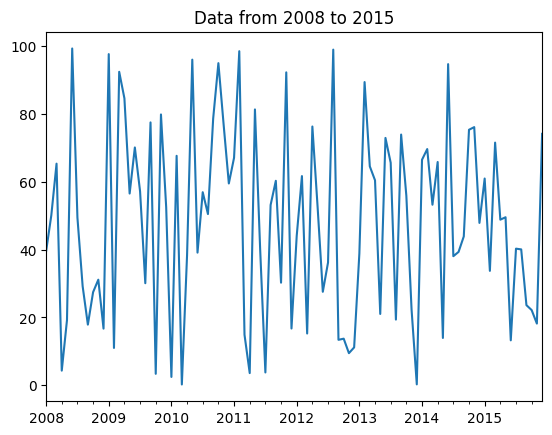

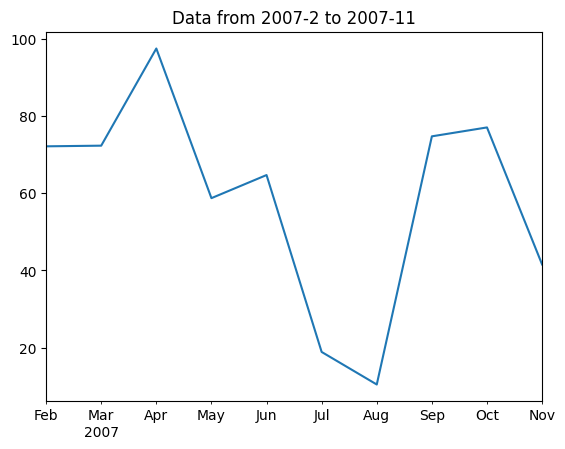

In [ ]:
# Plot within a certain year range
start = '2008'
end = '2015'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)
# Plot within a certain range of dates
start = '2007-2'
end = '2007-11'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)
plt.show()

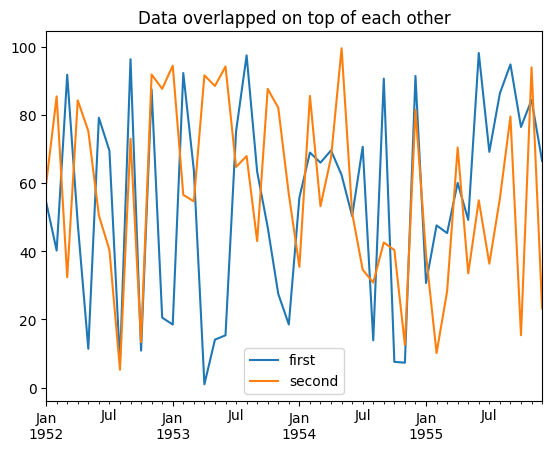

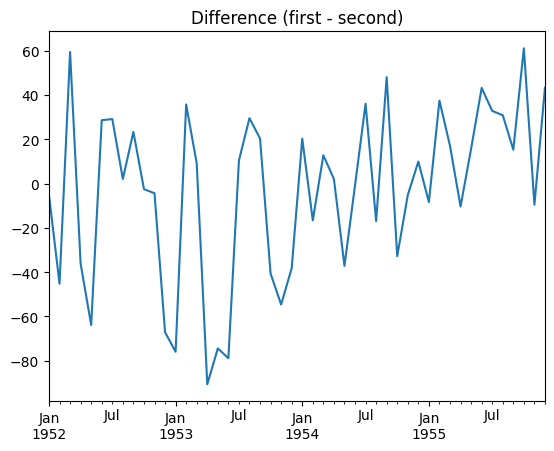

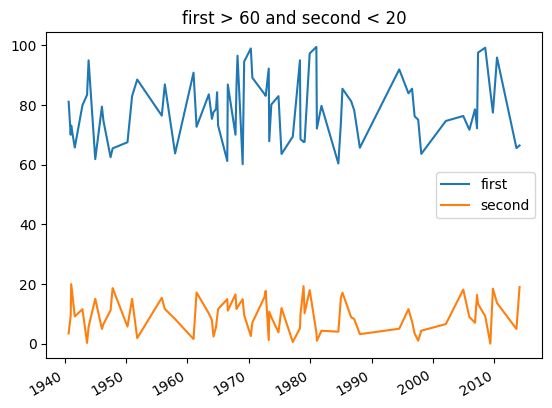

In [ ]:
# Load data
data1 = convert_data_to_timeseries(input_file, 2)
data2 = convert_data_to_timeseries(input_file, 3)
dataframe = pd.DataFrame({'first': data1, 'second': data2})

# Plot data
dataframe['1952':'1955'].plot()
plt.title('Data overlapped on top of each other')

# Plot the difference
plt.figure()
difference = dataframe['1952':'1955']['first'] - dataframe['1952':'1955']['second']
difference.plot()
plt.title('Difference (first - second)')

# When 'first' is greater than a certain threshold
# and 'second' is smaller than a certain threshold
dataframe[(dataframe['first'] > 60) & (dataframe['second'] < 20)].plot()
plt.title('first > 60 and second < 20')

plt.show()


Maximum:
 first     99.82
second    99.97
dtype: float64

Minimum:
 first     0.07
second    0.00
dtype: float64

Mean:
 first     51.264529
second    49.695417
dtype: float64

Mean row-wise:
 1940-01-31    81.885
1940-02-29    41.135
1940-03-31    10.305
1940-04-30    83.545
1940-05-31    18.395
1940-06-30    16.695
1940-07-31    86.875
1940-08-31    42.255
1940-09-30    55.880
1940-10-31    34.720
Freq: M, dtype: float64

Correlation coefficients:
            first    second
first   1.000000  0.077607
second  0.077607  1.000000


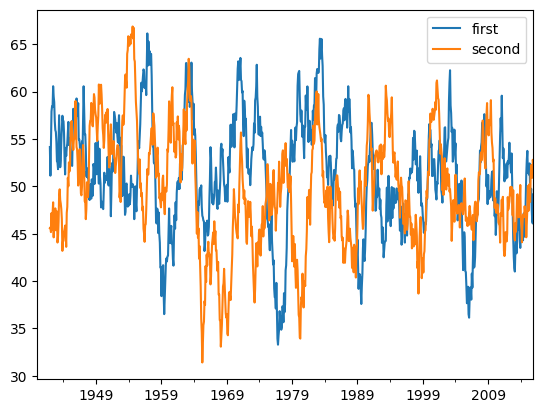

In [ ]:
# Print max and min
print ('\nMaximum:\n', dataframe.max())
print ('\nMinimum:\n', dataframe.min())

# Print mean
print ('\nMean:\n', dataframe.mean())
print ('\nMean row-wise:\n', dataframe.mean(1)[:10])
#Rolling mean refers to computing the mean of a signal in a window that keeps sliding on the time scale.
moving_avg = dataframe.rolling(24).mean()
moving_avg.plot()
#Correlation coefficients are useful in understanding the nature of the data, as follows:
# Print correlation coefficients
print('\nCorrelation coefficients:\n', dataframe.corr())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.4 MB/s eta 0:00:00

Training HMM....

Means and variances of hidden states:

Hidden state 1
Mean = 2.102
Variance = 2.032

Hidden state 2
Mean = 8.1
Variance = 0.674

Hidden state 3
Mean = 5.587
Variance = 0.268

Hidden state 4
Mean = 2.095
Variance = 1.981


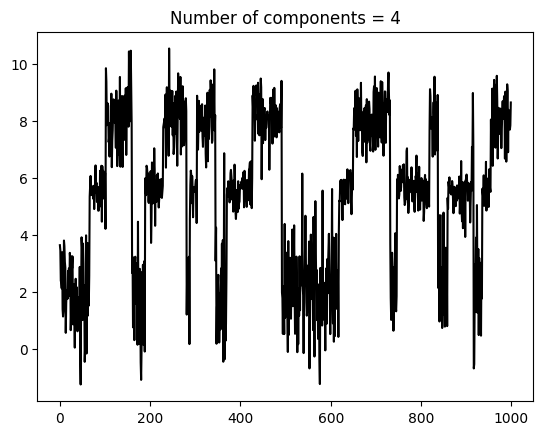

In [ ]:
import datetime
!pip install hmmlearn
from hmmlearn.hmm import GaussianHMM
# Load data from input file
input_file = 'data_hmm.txt'
data = np.loadtxt(input_file, delimiter=',')
# Arrange data for training
X = np.column_stack([data[:,2]])
# Create and train Gaussian HMM
print ("\nTraining HMM....")
num_components = 4
model = GaussianHMM(n_components=num_components, covariance_type="diag", n_iter=1000)
model.fit(X)

# Predict the hidden states of HMM
hidden_states = model.predict(X)
print ("\nMeans and variances of hidden states:")
for i in range(model.n_components):
    print ("\nHidden state", i+1)
    print ("Mean =", round(model.means_[i][0], 3))
    print ("Variance =", round(np.diag(model.covars_[i])[0], 3))
# Generate data using model
num_samples = 1000
samples, _ = model.sample(num_samples)
plt.plot(np.arange(num_samples), samples[:,0], c='black')
plt.title('Number of components = ' + str(num_components))
plt.show()
